<a href="https://colab.research.google.com/github/yakubszatkowski/100_days_python/blob/master/push/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [72]:
# grants access to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
# read csv
df = pd.read_csv('/content/drive/My Drive/QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [75]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [ ]:
df.tail()

**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [19]:
total_post_by_tag = df.groupby('TAG').sum(numeric_only=True)
highest_total_post_by_tag = total_post_by_tag.sort_values('POSTS', ascending=False)
highest_total_post_by_tag

,POSTS
TAG,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [61]:
total_post_by_tag = df.groupby('TAG').count()['DATE']
total_post_by_tag

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
Name: DATE, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [32]:
df['DATE'][1]
# or 
df.DATE[1]

'2008-08-01 00:00:00'

In [34]:
type(df['DATE'][1])

str

In [38]:
pd.to_datetime(df['DATE'][1])

Timestamp('2008-08-01 00:00:00')

In [76]:
# transforming whole column to date format
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [90]:
# reshaping the datagrame by using .pivot()
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [85]:
# amount of rows and columns of reshaped dataframe
reshaped_df.shape

(145, 14)

In [ ]:
# printing out the first 5 rows
reshaped_df.head()

In [ ]:
# the last 5 rows
reshaped_df.tail()

In [56]:
# columns names
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [93]:
# number of entries per column
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

In [98]:
# replacing NaN with 0
reshaped_df = reshaped_df.fillna(0)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [100]:
# checking if there are any NaN values left in the DataFrame
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [125]:
# selecting index
reshaped_df.index
# selecting 'java' column
reshaped_df.java  # or reshaped_df['java']

DATE
2008-07-01        0.0
2008-08-01      222.0
2008-09-01     1137.0
2008-10-01     1153.0
2008-11-01      958.0
               ...   
2020-03-01    13253.0
2020-04-01    15377.0
2020-05-01    14711.0
2020-06-01    13015.0
2020-07-01    12723.0
Name: java, Length: 145, dtype: float64

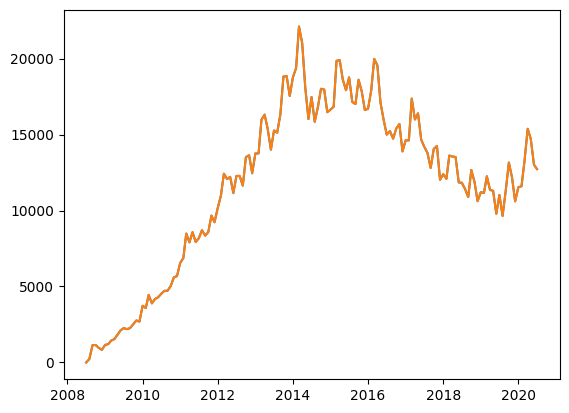

In [130]:
# creating a curve where x is index and y is java column
plt.plot(reshaped_df.index, reshaped_df['java'])  # this also works: plt.plot(reshaped_df.java) 

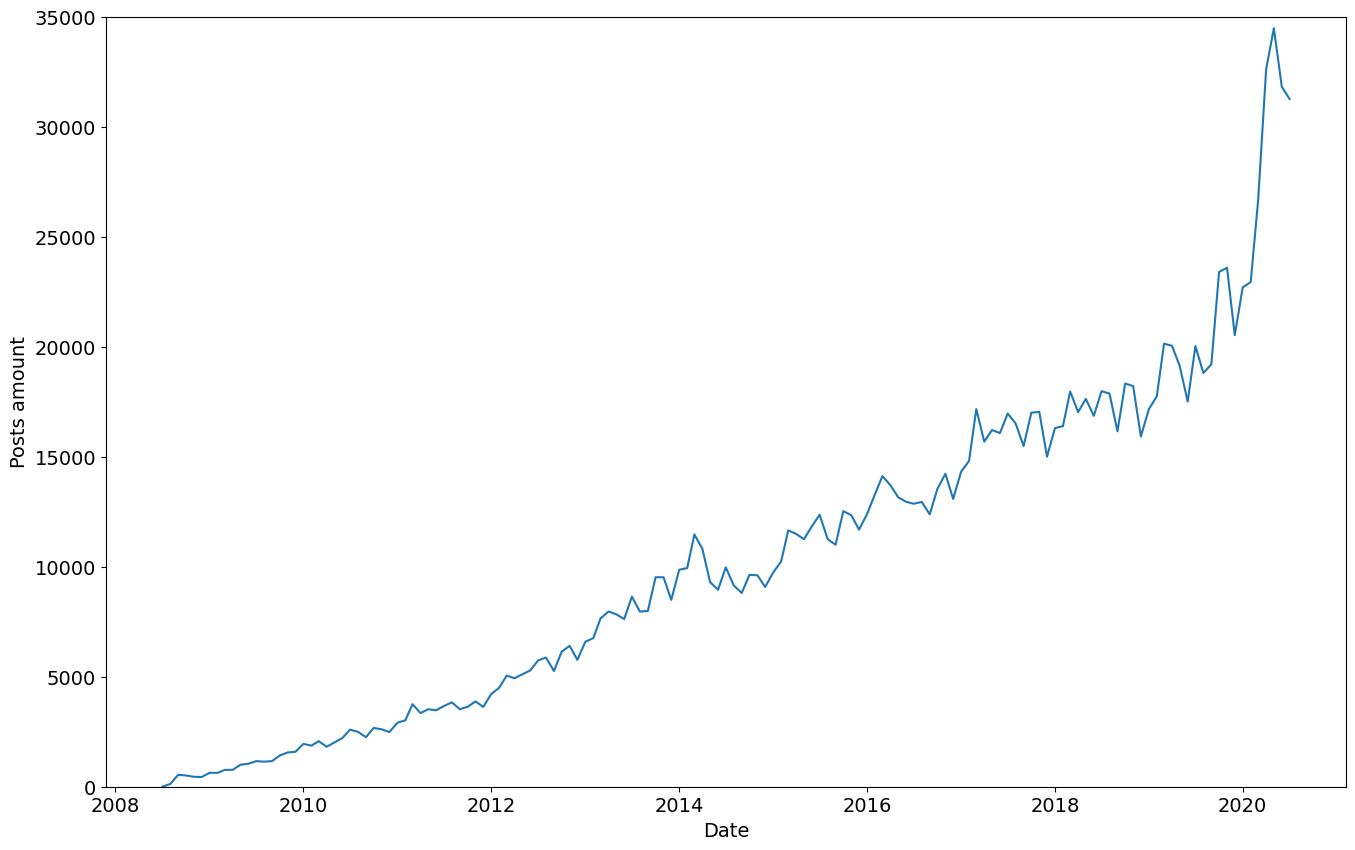

In [137]:
# using .figure() to change size of our chart
plt.figure(figsize=(16,10))
# .xticks .yticks to increase fontsize of the x and y axis
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# adding labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Posts amount', fontsize=14)
# setting limit of y axis equal to 0 (so the curve starts from the beginning of the grapth)
plt.ylim(0,35000)


# and finally drawing a plot
plt.plot(reshaped_df.python)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

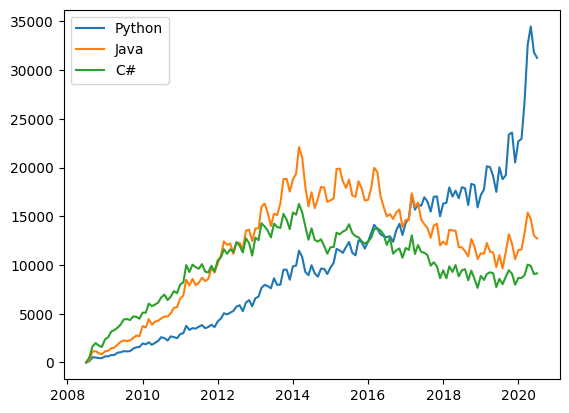

In [144]:
# draving multiple plots with legends, 
plt.plot(reshaped_df.python, label='Python')
plt.plot(reshaped_df.java, label='Java')
plt.plot(reshaped_df['c#'], label='C#')
plt.legend(loc='best')

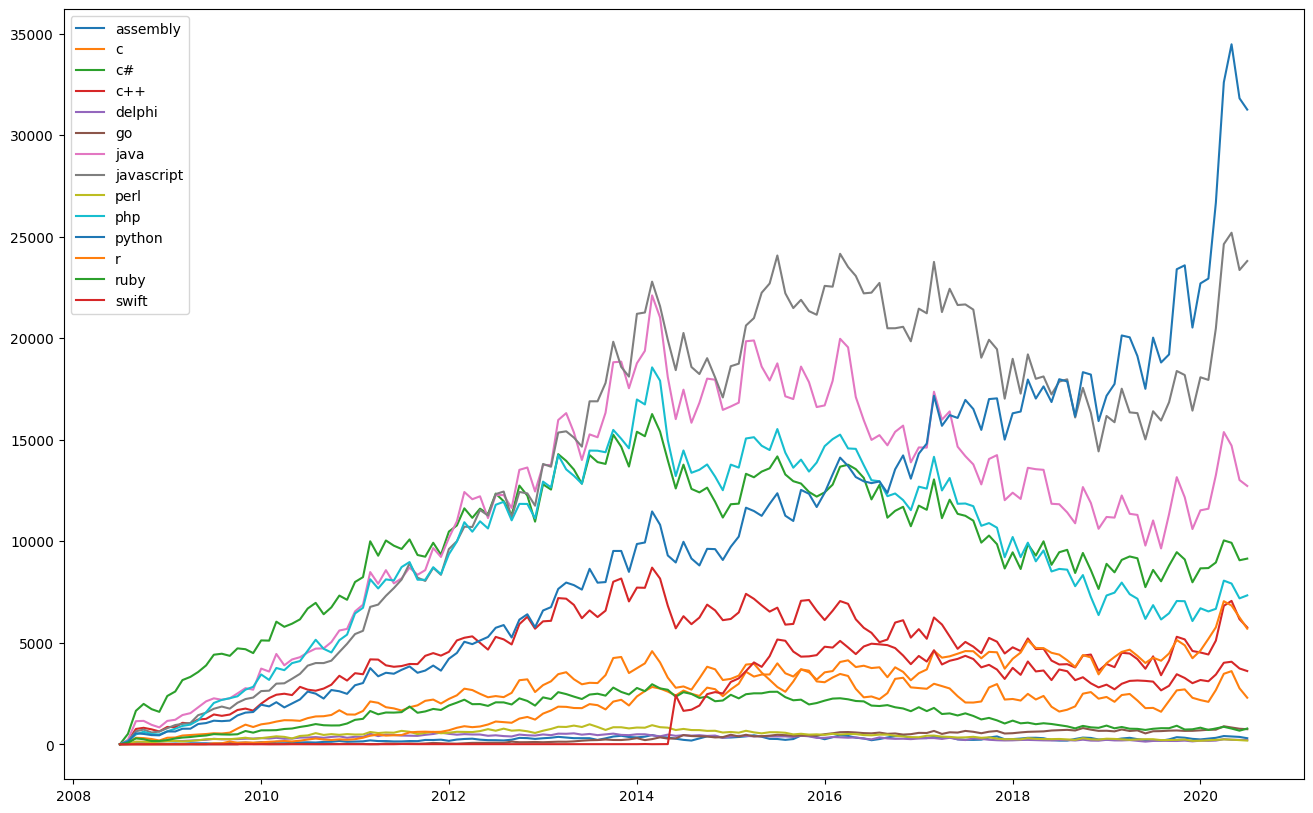

In [163]:
# drawing multible plots with for loop
plt.figure(figsize=(16,10))
for column in reshaped_df.columns:
  plt.plot(reshaped_df[column], label=f'{column}')
plt.legend(loc='upper left')

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

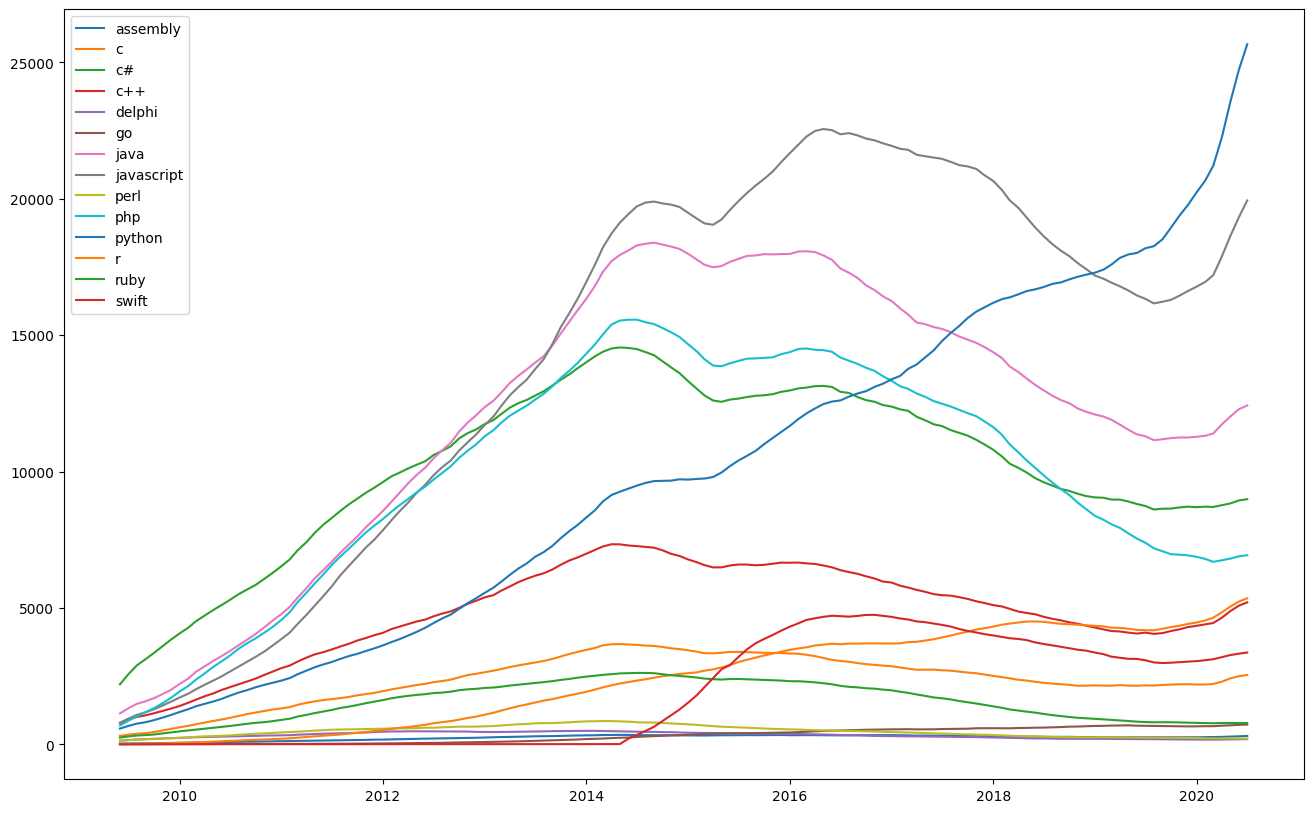

In [168]:
# rolling mean 12 - the bigget the window value in roll_df the smoother the 
roll_df = reshaped_df.rolling(window=12).mean()
plt.figure(figsize=(16,10))
for column in roll_df.columns:
  plt.plot(roll_df[column], label=f'{column}')
plt.legend(loc='upper left')




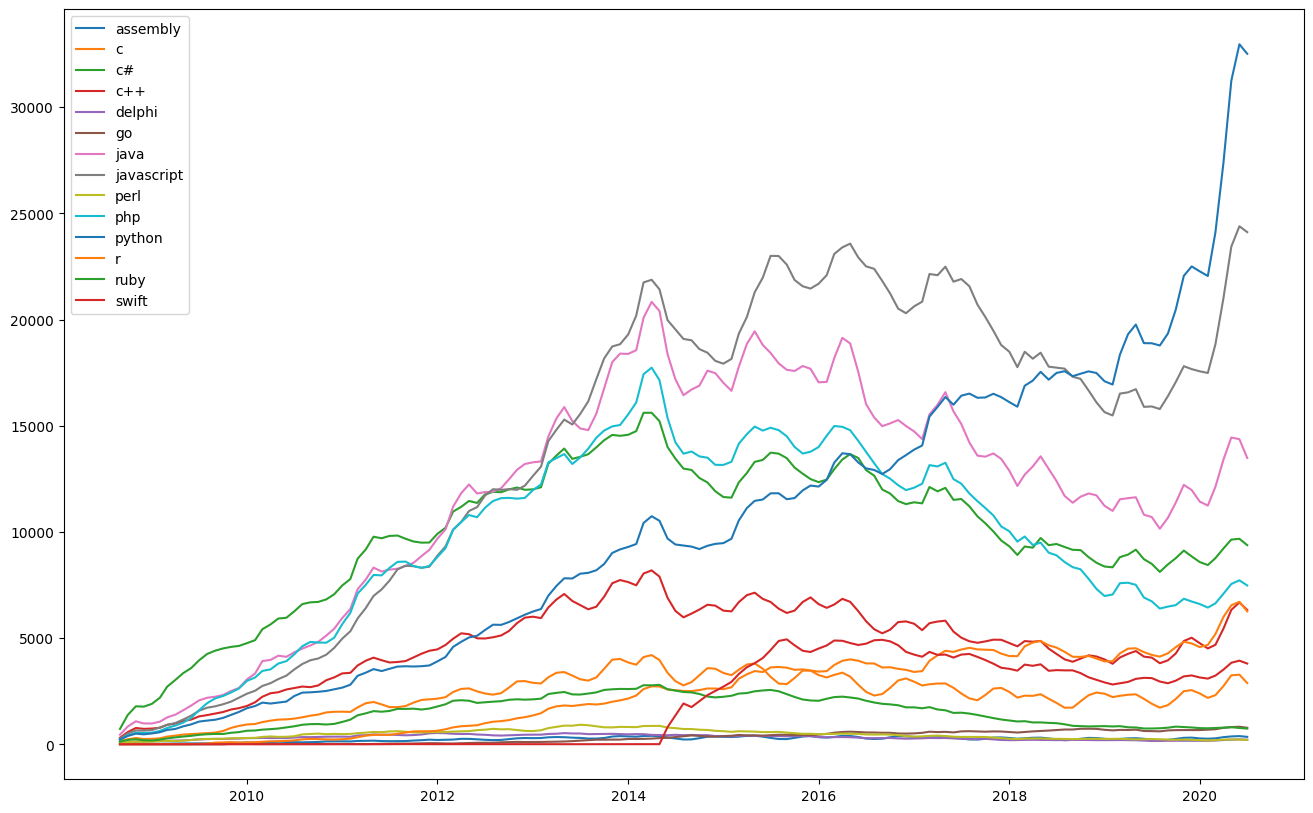

In [167]:
# rolling mean 3
roll_df = reshaped_df.rolling(window=3).mean()
plt.figure(figsize=(16,10))
for column in roll_df.columns:
  plt.plot(roll_df[column], label=f'{column}')
plt.legend(loc='upper left')

Looking at the data, what was the most popular programming language from 2008 to 2012 by the number of posts?

In [ ]:
start_date = '2008-07-01'
end_date = '2012-12-01'

# 1st solution - using logical statements
# if date (value) from is later (higher) than the date (value) of start_date and lower or equal date (value) from end_date it will return true
date_boolean = (reshaped_df.index > start_date) & (reshaped_df.index <= end_date)  

# 2nd solution - using .to_series().between()
date_boolean = reshaped_df.index.to_series().between(start_date, end_date, inclusive=True)

# will create a dataframe of true indexes (date column)
timeline_df = reshaped_df[date_boolean]
timeline_df
